<a href="https://colab.research.google.com/github/MrYousri97/Adidas-US-Sales-EDA/blob/main/Adidas_US_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Reading data 

In [ ]:
url='https://drive.google.com/file/d/1TVXb6RyY2nlS5o4oJ95M2Dz46p1jaX2I/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

In [ ]:
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","60,000","$30,000",In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","50,000","$15,000",In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","40,000","$14,000",In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"38,250","$13,388",In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"54,000","$16,200",In-store
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,320,$90,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,431,$138,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,754,$279,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,294,$123,Outlet


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9641 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9646 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Sales Method      9648 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.6+ KB


In [ ]:
data['Product'].nunique()

7

# Questions

In [ ]:
#Count of each product
#What about sales over years
#what about sales over months 
#how many products sold at every year
#average of sales for every region
#average of sales for every product
#which sale method is the most
#which sale method is the most for each region
#mean of sales
#what is the top product with total sales 
#what is the last product with total sales 
#which retailer is the most

# Describe Data


In [ ]:
data.describe()

,Retailer ID
count,9.648000e+03
mean,1.173850e+06
std,2.636038e+04
min,1.128299e+06
25%,1.185732e+06
50%,1.185732e+06
75%,1.185732e+06
max,1.197831e+06


it returns only retailer ID then we have problem with features like price,units sold , total sales so let's fix it

# Clean Data

In [ ]:
EXPData = data.drop(['Retailer ID','Invoice Date'],axis = 1)
for i in EXPData:
  print('Column Name:', i , 'Consists of :' , data[i].unique())
  print('-------------------------------------------------')

Column Name: Retailer Consists of : ['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']
-------------------------------------------------
Column Name: Region Consists of : ['Northeast' 'South' nan 'West' 'Midwest' 'Southeast']
-------------------------------------------------
Column Name: State Consists of : ['New York' 'Texas' 'California' 'Illinois' 'Pennsylvania' 'Nevada'
 'Colorado' 'Washington' 'Florida' 'Minnesota' 'Montana' 'Tennessee'
 'Nebraska' 'Alabama' 'Maine' 'Alaska' 'Hawaii' 'Wyoming' 'Virginia'
 'Michigan' 'Missouri' 'Utah' 'Oregon' 'Louisiana' 'Idaho' 'Arizona'
 'New Mexico' 'Georgia' 'South Carolina' 'North Carolina' 'Ohio'
 'Kentucky' 'Mississippi' 'Arkansas' 'Oklahoma' 'Kansas' 'South Dakota'
 'North Dakota' 'Iowa' 'Wisconsin' 'Indiana' 'West Virginia' 'Maryland'
 'Delaware' 'New Jersey' 'Connecticut' 'Rhode Island' 'Massachusetts'
 'Vermont' 'New Hampshire']
-------------------------------------------------
Column Name: City Consists of : ['New 

In [ ]:
for i in EXPData:
  print('Column Name:', i , 'Consists of :\n', data[i].value_counts())
  print('-------------------------------------------------')

Column Name: Retailer Consists of :
 Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: int64
-------------------------------------------------
Column Name: Region Consists of :
 West         2446
Northeast    2376
Midwest      1869
South        1726
Southeast    1224
Name: Region, dtype: int64
-------------------------------------------------
Column Name: State Consists of :
 California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Connecticut       216
Rhode Island      216
Massachusetts     216
Vermont           216
Utah              216
Arizona           216
New Hampshire     216
Pennsylvania      216
Nevada            216
Alabama           216
Tennessee 

## Fix object feature with integer data

In [ ]:
data['Total Sales']= data['Total Sales'].str.replace(",","")
data['Total Sales']= data['Total Sales'].astype('int')

In [ ]:
data['Total Sales'].describe()

count     9648.000000
mean      9327.367537
std      14191.586965
min          0.000000
25%        425.750000
50%        958.000000
75%      15000.000000
max      82500.000000
Name: Total Sales, dtype: float64

In [ ]:
data['Operating Profit']= data['Operating Profit'].str.replace(",","")
data['Operating Profit']= data['Operating Profit'].str.replace("$","")
data['Operating Profit']= data['Operating Profit'].astype('int')

<ipython-input-12-3acf3dc13711>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Operating Profit']= data['Operating Profit'].str.replace("$","")


In [ ]:
data['Operating Profit'].describe()

count     9648.000000
mean      3442.564884
std       5419.341299
min          0.000000
25%        192.000000
50%        437.000000
75%       5206.000000
max      39000.000000
Name: Operating Profit, dtype: float64

In [ ]:
data['Units Sold']= data['Units Sold'].str.replace(",","")
data['Units Sold']= data['Units Sold'].astype('int')

In [ ]:
data['Units Sold'].describe()

count    9648.000000
mean      256.930037
std       214.252030
min         0.000000
25%       106.000000
50%       176.000000
75%       350.000000
max      1275.000000
Name: Units Sold, dtype: float64

In [ ]:
data['Price per Unit']= data['Price per Unit'].str.replace("$","")
data['Price per Unit']= data['Price per Unit'].astype('float')

<ipython-input-16-0a55cf26bbbc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price per Unit']= data['Price per Unit'].str.replace("$","")


In [ ]:
data['Price per Unit'].describe()

count    9646.000000
mean       45.215633
std        14.706055
min         7.000000
25%        35.000000
50%        45.000000
75%        55.000000
max       110.000000
Name: Price per Unit, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9641 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9646 non-null   float64
 8   Units Sold        9648 non-null   int64  
 9   Total Sales       9648 non-null   int64  
 10  Operating Profit  9648 non-null   int64  
 11  Sales Method      9648 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 904.6+ KB


In [ ]:
data['Invoice Date']= pd.to_datetime(data['Invoice Date'])

In [ ]:
data['Invoice Date']

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
4      2020-01-05
          ...    
9643   2021-01-24
9644   2021-01-24
9645   2021-02-22
9646   2021-02-22
9647   2021-02-22
Name: Invoice Date, Length: 9648, dtype: datetime64[ns]

In [ ]:
data['Month']=data['Invoice Date'].dt.month
data['Year']=data['Invoice Date'].dt.year
data.drop('Invoice Date',axis =1 , inplace=True)

In [ ]:
data.head()

,Retailer,Retailer ID,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
0,Foot Locker,1185732,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000,In-store,1,2020
1,Foot Locker,1185732,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000,In-store,1,2020
2,Foot Locker,1185732,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000,In-store,1,2020
3,Foot Locker,1185732,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13388,In-store,1,2020
4,Foot Locker,1185732,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200,In-store,1,2020


## Fill Null Values

In [ ]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Region              7
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Month               0
Year                0
dtype: int64

In [ ]:
data[data.Region.isnull()]

,Retailer,Retailer ID,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
76,Sports Direct,1197831,NaN,Texas,Houston,Women's Street Footwear,35.0,675,23625,8269,Outlet,7,2020
81,Sports Direct,1197831,NaN,Texas,Houston,Men's Athletic Footwear,40.0,875,35000,12250,Outlet,8,2020
163,West Gear,1128299,NaN,California,San Francisco,Women's Apparel,80.0,700,56000,8400,Outlet,12,2020
168,West Gear,1128299,NaN,California,San Francisco,Men's Apparel,65.0,550,35750,19663,Outlet,1,2021
293,Foot Locker,1185732,NaN,Illinois,Chicago,Women's Athletic Footwear,40.0,100,4000,1600,Outlet,6,2021
297,Foot Locker,1185732,NaN,Illinois,Chicago,Men's Athletic Footwear,50.0,200,10000,3500,Outlet,6,2021
304,Foot Locker,1185732,NaN,Illinois,Chicago,Women's Street Footwear,40.0,150,6000,2100,Outlet,6,2021


In [ ]:
data.iloc[76,2]="South"
data.iloc[81,2]="South"
data.iloc[163,2]="West"
data.iloc[168,2]="West"
data.iloc[293,2]="Midwest"
data.iloc[297,2]="Midwest"
data.iloc[304,2]="Midwest"

In [ ]:
data[data['Price per Unit'].isnull()]

,Retailer,Retailer ID,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
16,Foot Locker,1185732,Northeast,New York,New York,Men's Apparel,NaN,850,51000,15300,Outlet,1,2020
78,Sports Direct,1197831,South,Texas,Houston,Men's Apparel,NaN,500,20000,6000,Outlet,7,2020


In [ ]:
data.iloc[16,6]=60.0
data.iloc[78,6]=40.0


In [ ]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Month               0
Year                0
dtype: int64

In [ ]:
data['Total Sales']=data['Units Sold']*data['Price per Unit']

Done

Total Sales Information for each region

In [ ]:
data.groupby('Region')['Total Sales'].agg(['count','mean','min','max','sum'])

,count,mean,min,max,sum
Region,,,,,
Midwest,1872,8907.283120,0.0,61875.0,16674434.0
Northeast,2376,10554.826178,160.0,78000.0,25078267.0
South,1728,11923.238426,506.0,82500.0,20603356.0
Southeast,1224,17462.774510,754.0,82500.0,21374436.0
West,2448,14884.051062,735.0,73500.0,36436157.0


average price for each product for regions

In [ ]:
data.groupby(['Region','Product'])['Price per Unit'].mean()

Region     Product                  
Midwest    Men's Apparel                47.144231
           Men's Athletic Footwear      38.137821
           Men's Street Footwear        41.810897
           Women's Apparel              47.455128
           Women's Athletic Footwear    34.544872
           Women's Street Footwear      33.080128
Northeast  Men's Apparel                52.450633
           Men's Athletic Footwear      44.941919
           Men's Street Footwear        48.727273
           Men's aparel                 60.000000
           Women's Apparel              52.388889
           Women's Athletic Footwear    41.492424
           Women's Street Footwear      40.128788
South      Men's Apparel                42.798611
           Men's Athletic Footwear      36.590278
           Men's Street Footwear        35.263889
           Women's Apparel              43.538194
           Women's Athletic Footwear    36.635417
           Women's Street Footwear      34.593750
Southeast  Me

let's see which method of sale is most

In [ ]:
data.groupby('Sales Method')['Total Sales'].agg(['count','sum'])

,count,sum
Sales Method,,
In-store,1740,35664375.0
Online,4889,44965657.0
Outlet,3019,39536618.0


top 10 records in data by sale

In [ ]:
data.sort_values(by=['Total Sales'],ascending = False).head(10)

,Retailer,Retailer ID,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
1970,West Gear,1128299,South,Louisiana,New Orleans,Women's Apparel,110.0,750,82500.0,28875,Online,6,2021
1394,Walmart,1128299,Southeast,Florida,Orlando,Women's Apparel,110.0,750,82500.0,37125,In-store,6,2021
1395,Walmart,1128299,Southeast,Florida,Orlando,Men's Street Footwear,90.0,900,81000.0,24300,In-store,7,2021
1971,West Gear,1128299,South,Louisiana,New Orleans,Men's Street Footwear,90.0,900,81000.0,32400,Online,7,2021
1977,West Gear,1128299,South,Louisiana,New Orleans,Men's Street Footwear,95.0,850,80750.0,32300,Online,8,2021
1401,Walmart,1128299,Southeast,Florida,Orlando,Men's Street Footwear,95.0,850,80750.0,24225,In-store,8,2021
62,Walmart,1185732,Northeast,New York,New York,Men's Street Footwear,65.0,1200,78000.0,39000,Outlet,5,2020
36,Foot Locker,1185732,Northeast,New York,New York,Men's Street Footwear,60.0,1275,76500.0,38250,Outlet,3,2020
2361,Foot Locker,1185732,Southeast,South Carolina,Charleston,Men's Street Footwear,70.0,1075,75250.0,33863,Online,12,2021
30,Foot Locker,1185732,Northeast,New York,New York,Men's Street Footwear,60.0,1250,75000.0,37500,Outlet,3,2020


# Let's visualize data

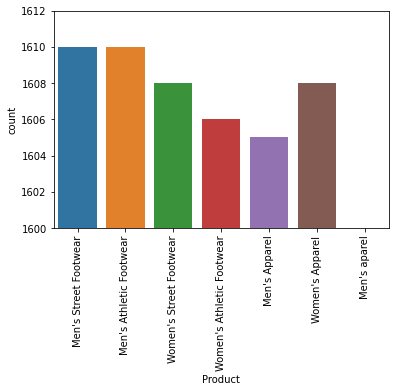

In [ ]:
plt.xticks(rotation=90)
plt.ylim(1600,1612)
sns.countplot(data = data , x='Product')
plt.show()

In [ ]:
data.Product.value_counts()

Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1605
Men's aparel                    1
Name: Product, dtype: int64

In [ ]:
data[data.Product=='Men\'s aparel']

,Retailer,Retailer ID,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
34,Foot Locker,1185732,Northeast,New York,New York,Men's aparel,60.0,900,54000.0,16200,Outlet,3,2020


we found misspelling with 1 value count let fix it and add it into men's apparel

In [ ]:
data.iloc[34,5]='Men\'s Apparel'

Count For each Product

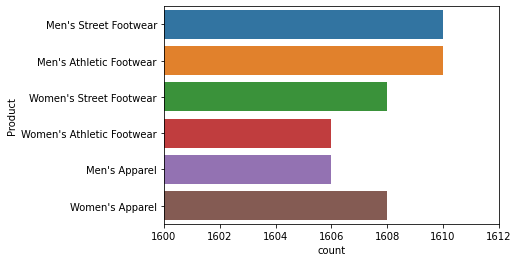

In [ ]:
plt.xticks(rotation=0)
plt.xlim(1600,1612)
sns.countplot(data = data , y='Product')
plt.show()

Count of sales method

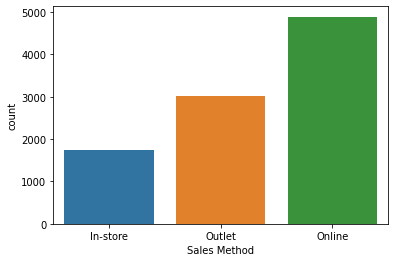

In [ ]:
sns.countplot(data = data , x = "Sales Method")
plt.show()

Count of Sales method by each Region

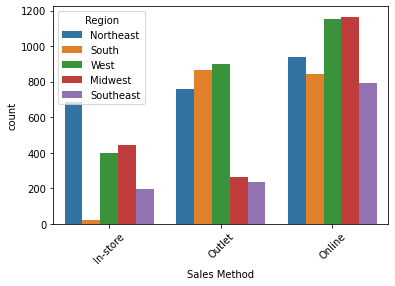

In [ ]:
plt.xticks(rotation=45)
sns.countplot(data = data , x = "Sales Method" , hue = "Region")
plt.show()

Sales by each region

<AxesSubplot:xlabel='Region', ylabel='count'>

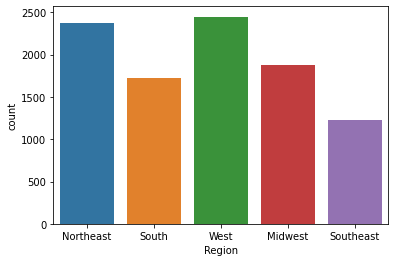

In [ ]:
sns.countplot(data= data , x = "Region")

<AxesSubplot:xlabel='Product', ylabel='count'>

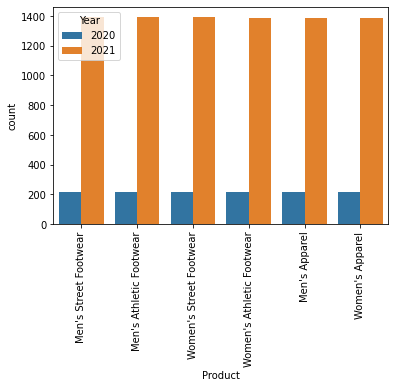

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data = data , x  ="Product" , hue = "Year")

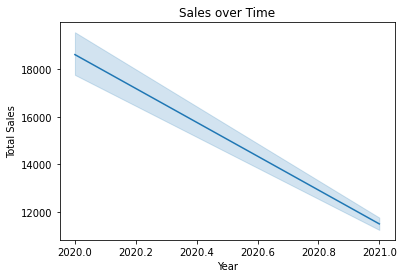

In [ ]:
sns.lineplot(x='Year', y='Total Sales', data=data)
plt.title('Sales over Time')
plt.show()

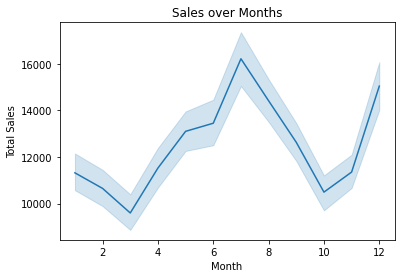

In [ ]:
sns.lineplot(x='Month', y='Total Sales', data=data)
plt.title('Sales over Months')
plt.show()

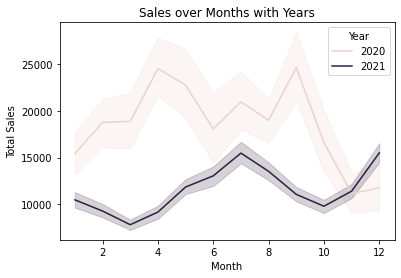

In [ ]:
sns.lineplot(x='Month', y='Total Sales',hue="Year",  data=data)
plt.title('Sales over Months with Years')
plt.show()

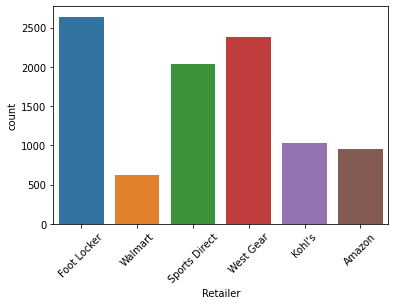

In [ ]:
plt.xticks(rotation=45)
sns.countplot(data = data , x = "Retailer")
plt.show()

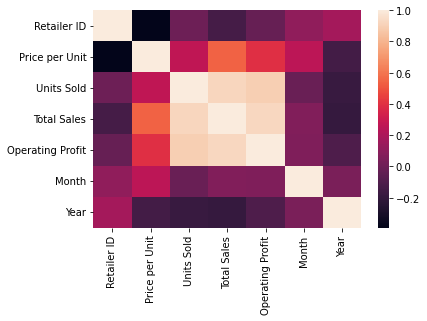

In [ ]:
plt.xticks(rotation=45)
sns.heatmap(data.corr())
plt.show()

In [ ]:
monthly_sales = data.groupby(['Month','Year'], as_index=False).sum()
monthly_sales = monthly_sales.set_index("Month")


In [ ]:
monthly_sales

,Year,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit
Month,,,,,,
1,2020,172690830,7078.0,48333,2312746.0,583006
1,2021,831143551,27175.0,179299,7432021.0,1931210
2,2020,130349076,6317.0,37846,2140813.0,520734
2,2021,775705737,24251.0,156113,6123040.0,1618560
3,2020,150736252,6555.0,46972,2474202.0,586207
3,2021,789507453,23734.0,143988,5220782.0,1457799
4,2020,150699180,7568.0,54709,3193081.0,930137
4,2021,837324717,27247.0,161717,6498339.0,1825811
5,2020,109083694,5649.0,35705,2164764.0,587089


In [ ]:
a=monthly_sales[monthly_sales.Year==2020]
b=monthly_sales[monthly_sales.Year==2021]

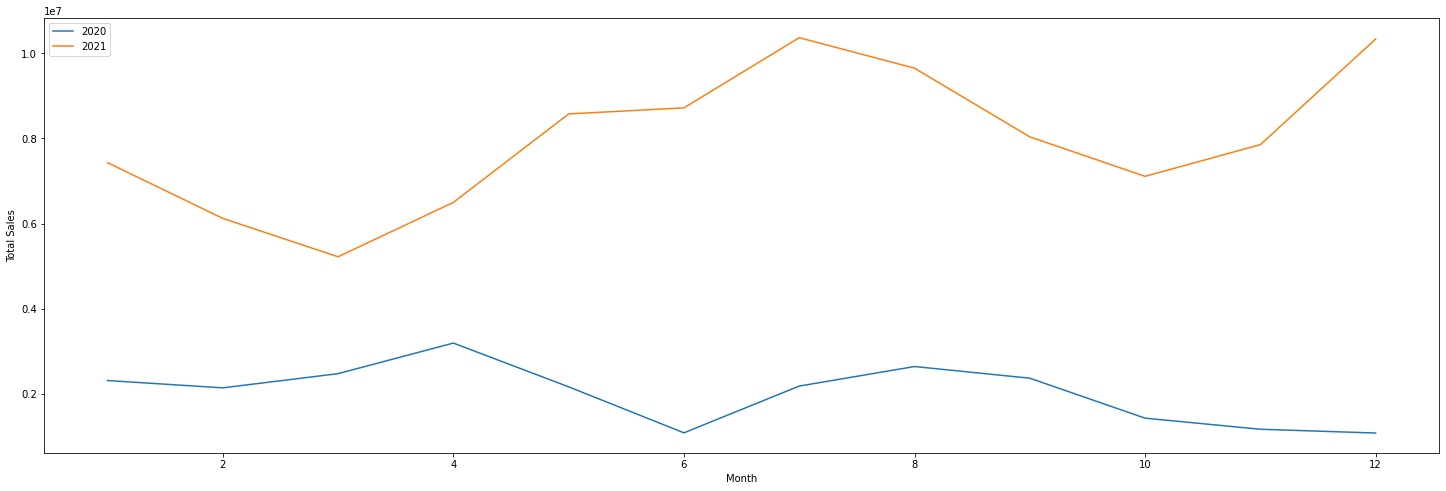

In [ ]:
plt.figure(figsize=(25,8))
sns.lineplot(x='Month', y='Total Sales', data=a,label ='2020')
sns.lineplot(x='Month', y='Total Sales', data=b,label ='2021')
plt.legend()
plt.show()